In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona 
import os
import pandas as pd
import folium
from folium.features import GeoJsonPopup, GeoJsonTooltip
from folium.plugins import GroupedLayerControl
from shapely.ops import unary_union

In [2]:
gpkg_path = "Data\dataset_completo.gpkg"

layers = fiona.listlayers(gpkg_path)

print("Layers in GeoPackage:")
for layer in layers:
    print(layer)

Layers in GeoPackage:
037006_Bologna-2025-03-12T15Z — lines
037006_Bologna-2025-03-12T15Z — multilinestrings
037006_Bologna-2025-03-12T15Z — multipolygons
037006_Bologna-2025-03-12T15Z — other_relations
037006_Bologna-2025-03-12T15Z — points
aree-ortive
aree-statistiche
aree-verdi_entrate_centroidi
attrezzature_ludiche_ginniche_sportive
bagni-pubblici
cammini-e-percorsi
carta-tecnica-comunale-filari-siepi
carta-tecnica-comunale-marciapiedi
carta-tecnica-comunale-percorsi-pedonali
carta-tecnica-comunale-toponimi-parchi-e-giardini
piste-ciclopedonali
popolazione-arborea
portici
rastrelliere-per-biciclette
verde_privato_urbanizzato
zona-pedonale-centro-storico
layer_styles


# EDA

## Visualize each layer

Found 22 layers.

=== Layer: 037006_Bologna-2025-03-12T15Z — lines ===
Number of features: 36734
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['osm_id', 'name', 'highway', 'waterway', 'aerialway', 'barrier', 'man_made', 'railway', 'z_order', 'other_tags', 'geometry']
Missing values per column:
osm_id            0
name          26221
highway        9361
waterway      36419
aerialway     36734
barrier       33135
man_made      36589
railway       34872
z_order           0
other_tags     6286
geometry          0
dtype: int64


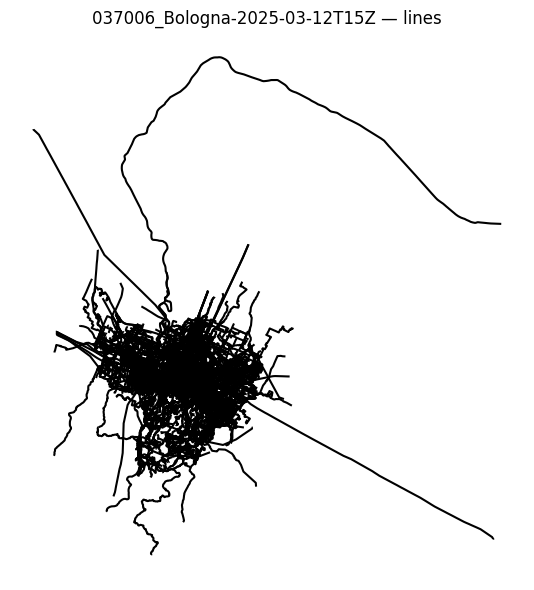



=== Layer: 037006_Bologna-2025-03-12T15Z — multilinestrings ===
Number of features: 509
Geometry type: ['MultiLineString']
CRS: EPSG:4326
Columns: ['osm_id', 'name', 'type', 'other_tags', 'geometry']
Missing values per column:
osm_id         0
name          13
type           0
other_tags     0
geometry       0
dtype: int64


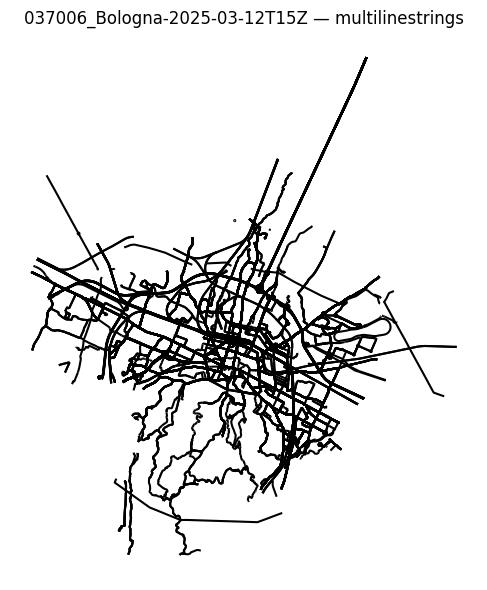



=== Layer: 037006_Bologna-2025-03-12T15Z — multipolygons ===
Number of features: 62007
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['osm_id', 'osm_way_id', 'name', 'type', 'aeroway', 'amenity', 'admin_level', 'barrier', 'boundary', 'building', 'craft', 'geological', 'historic', 'land_area', 'landuse', 'leisure', 'man_made', 'military', 'natural', 'office', 'place', 'shop', 'sport', 'tourism', 'other_tags', 'geometry']
Missing values per column:
osm_id         60561
osm_way_id      1446
name           59981
type           60557
aeroway        61946
amenity        58469
admin_level    61997
barrier        61933
boundary       61959
building       10159
craft          62007
geological     62007
historic       61922
land_area      62007
landuse        57891
leisure        60368
man_made       61878
military       62001
natural        61372
office         61969
place          61962
shop           61867
sport          61563
tourism        61949
other_tags     54470
geometry    

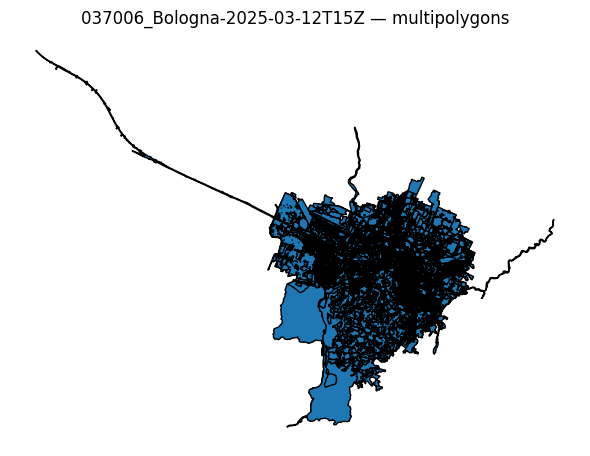



=== Layer: 037006_Bologna-2025-03-12T15Z — other_relations ===
Number of features: 1504
Geometry type: ['GeometryCollection']
CRS: None
Columns: ['osm_id', 'name', 'type', 'other_tags', 'geometry']
Missing values per column:
osm_id          0
name          803
type            0
other_tags     59
geometry        0
dtype: int64


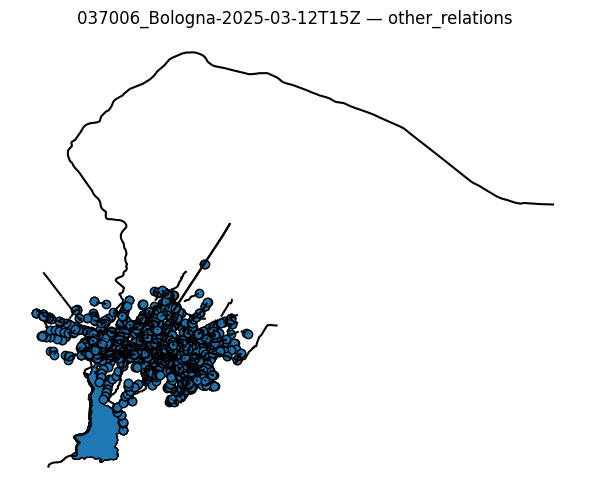



=== Layer: 037006_Bologna-2025-03-12T15Z — points ===
Number of features: 171737
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['osm_id', 'name', 'barrier', 'highway', 'ref', 'address', 'is_in', 'place', 'man_made', 'other_tags', 'geometry']
Missing values per column:
osm_id             0
name          163759
barrier       168290
highway       164967
ref           169235
address       171737
is_in         171737
place         171638
man_made      171467
other_tags      3763
geometry           0
dtype: int64


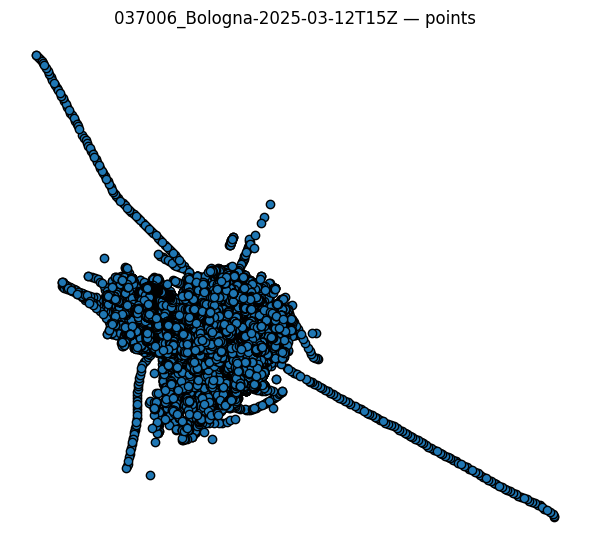



=== Layer: aree-ortive ===
Number of features: 21
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['denominazione_orto', 'indirizzo_orto', 'gestore_orto', 'indirizzo_gestore_orto', 'numero_orti', 'telefono_gestore', 'fax_gestore', 'mail_gestore', 'quartiere', 'lon', 'lat', 'nomezona', 'area_stati', 'geometry']
Missing values per column:
denominazione_orto         0
indirizzo_orto             0
gestore_orto               0
indirizzo_gestore_orto     0
numero_orti                0
telefono_gestore           6
fax_gestore               10
mail_gestore               1
quartiere                  0
lon                        0
lat                        0
nomezona                   0
area_stati                 0
geometry                   0
dtype: int64


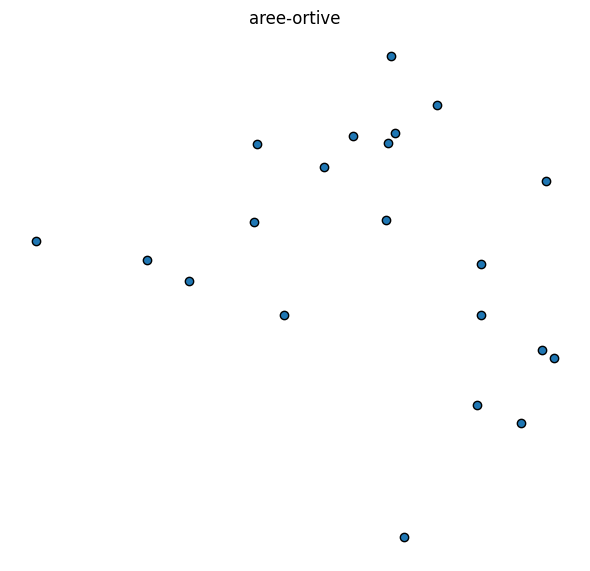



=== Layer: aree-statistiche ===
Number of features: 90
Geometry type: ['Polygon']
CRS: EPSG:4326
Columns: ['codice_area_statistica', 'geo_point_2d', 'area_statistica', 'cod_quar', 'quartiere', 'cod_zona', 'zona', 'geometry']
Missing values per column:
codice_area_statistica    0
geo_point_2d              0
area_statistica           0
cod_quar                  0
quartiere                 0
cod_zona                  0
zona                      0
geometry                  0
dtype: int64


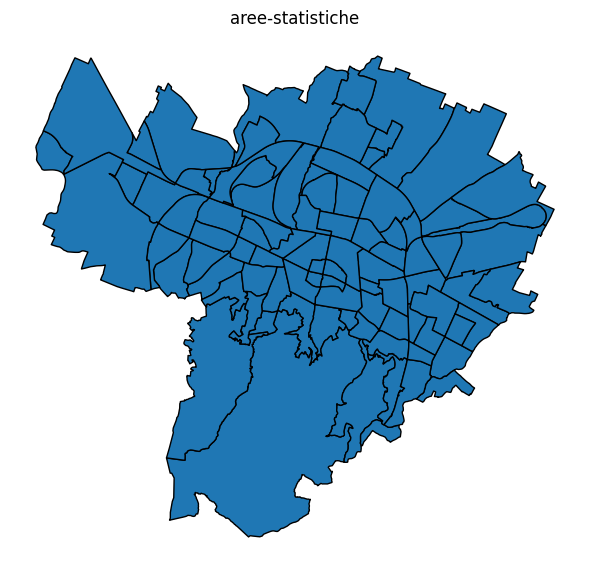



=== Layer: aree-verdi_entrate_centroidi ===
Number of features: 1200
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'tipo_di_area', 'nome', 'quartiere', 'ubicazione', 'geometry']
Missing values per column:
geo_point_2d      0
tipo_di_area    528
nome            528
quartiere       555
ubicazione      558
geometry          0
dtype: int64


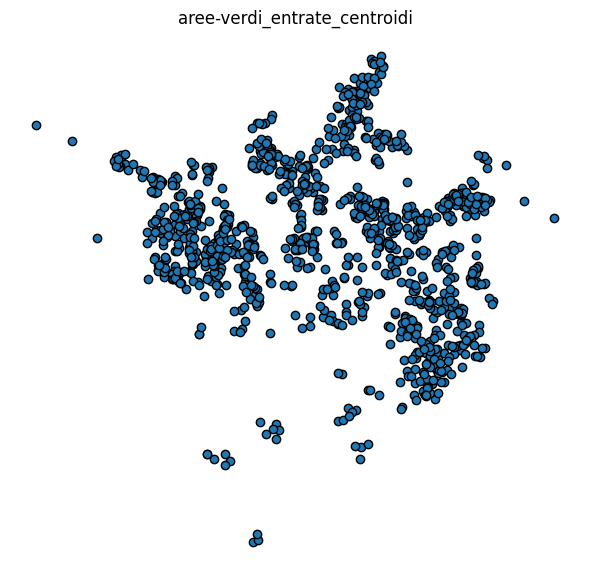



=== Layer: attrezzature_ludiche_ginniche_sportive ===
Number of features: 1414
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'categoria', 'classe', 'presenza', 'geometry']
Missing values per column:
geo_point_2d    0
categoria       1
classe          0
presenza        6
geometry        0
dtype: int64


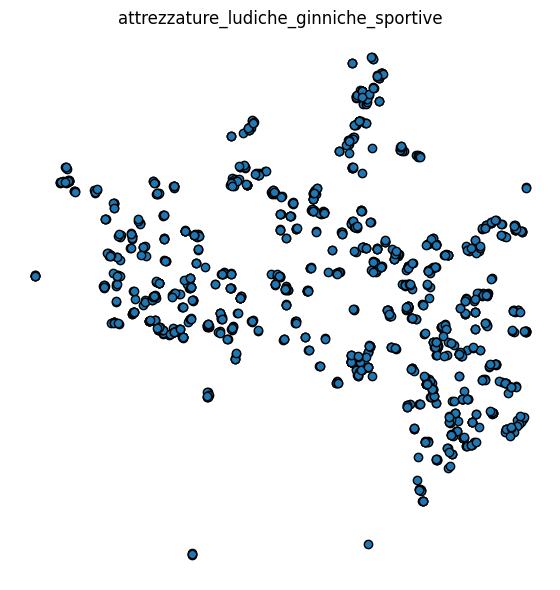



=== Layer: bagni-pubblici ===
Number of features: 30
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['tipologia', 'note', 'costo', 'posizione', 'geo_point_2d', 'descrizione', 'orari', 'accessibile', 'localizzazione', 'quartiere', 'sito_web', 'geo_id', 'sez_2011_istat', 'zona_fiu', 'area_stat', 'geometry']
Missing values per column:
tipologia          0
note              16
costo              0
posizione          0
geo_point_2d       0
descrizione        0
orari              0
accessibile        0
localizzazione     0
quartiere          0
sito_web          25
geo_id             0
sez_2011_istat     0
zona_fiu           0
area_stat          0
geometry           0
dtype: int64


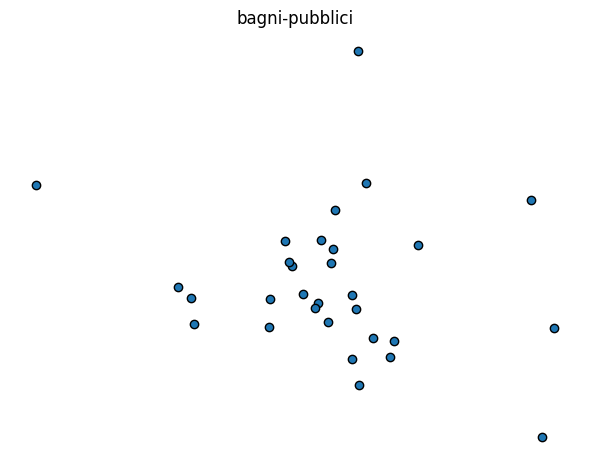



=== Layer: cammini-e-percorsi ===
Number of features: 2096
Geometry type: ['MultiLineString']
CRS: EPSG:4326
Columns: ['id', 'geo_point_2d', 'ascent', 'bicycle', 'colour', 'contact_we', 'descriptio', 'descript_1', 'descript_2', 'descript_3', 'destinatio', 'disused', 'duration', 'duration_b', 'duration_f', 'ele_from', 'ele_max', 'ele_min', 'ele_to', 'fixme', 'foot', 'from', 'from_ar', 'highway', 'name', 'name_it', 'network_ty', 'note_2', 'note_it', 'note_proje', 'operator', 'pilgrimage', 'ref_fie', 'ref_rei', 'reference', 'reg_ref', 'religion', 'roundtrip', 'sac_scale', 'source', 'symbol_it', 'to', 'tourism', 'via', 'visibility', 'website', 'wikidata', 'wikipedia', 'lunghezza', 'geometry']
Missing values per column:
id                 0
geo_point_2d       0
ascent           795
bicycle         2095
colour          2091
contact_we      2094
descriptio      1532
descript_1      2093
descript_2      1831
descript_3      2095
destinatio      2095
disused         2087
duration        2063


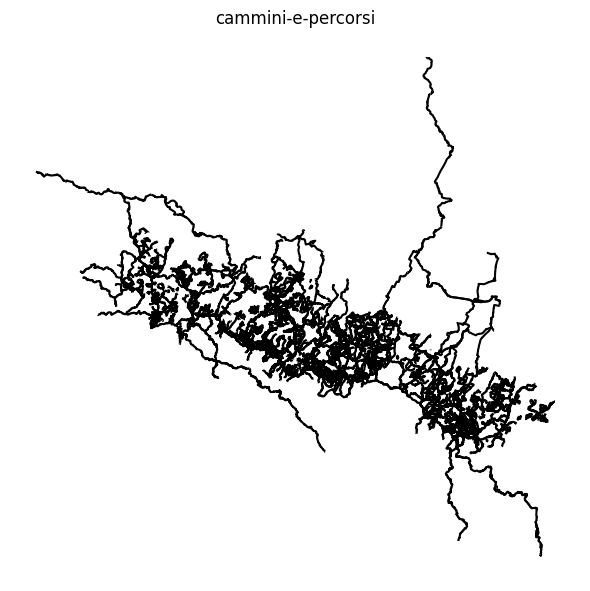



=== Layer: carta-tecnica-comunale-filari-siepi ===
Number of features: 8588
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'data_istit', 'data_varia', 'lunghez', 'descrizion', 'origine', 'geometry']
Missing values per column:
geo_point_2d       0
codice_ogg         0
data_istit         0
data_varia      8502
lunghez            0
descrizion         0
origine            0
geometry           0
dtype: int64


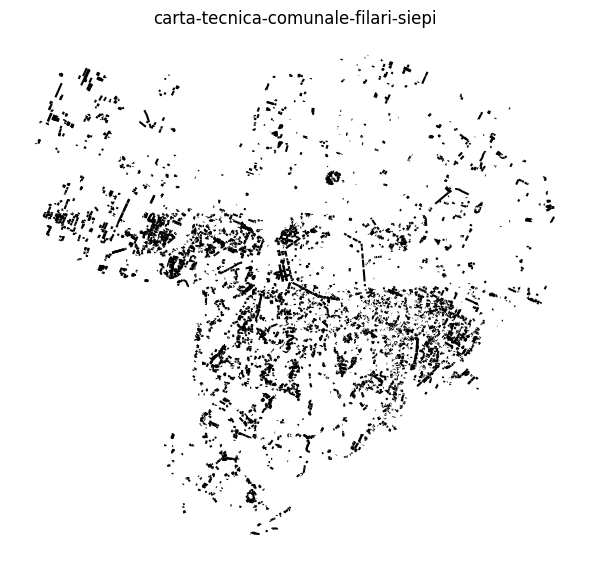



=== Layer: carta-tecnica-comunale-marciapiedi ===
Number of features: 13089
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'data_istit', 'data_varia', 'lunghez', 'descrizion', 'origine', 'geometry']
Missing values per column:
geo_point_2d        0
codice_ogg          0
data_istit          0
data_varia      12274
lunghez             0
descrizion          0
origine             0
geometry            0
dtype: int64


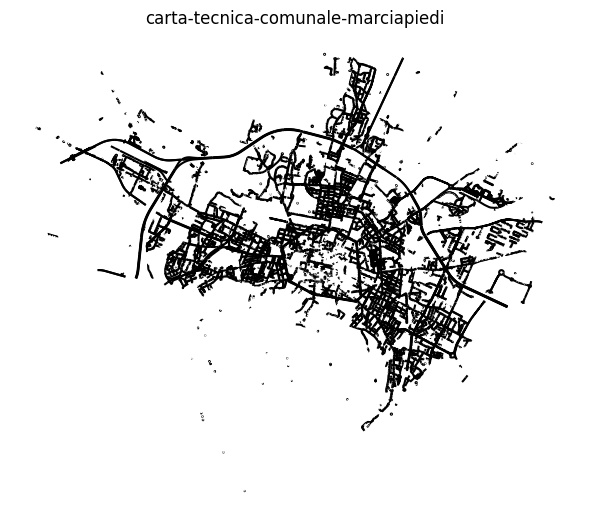



=== Layer: carta-tecnica-comunale-percorsi-pedonali ===
Number of features: 1379
Geometry type: ['LineString']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'data_istit', 'data_varia', 'lunghez', 'descrizion', 'origine', 'geometry']
Missing values per column:
geo_point_2d       0
codice_ogg         0
data_istit         0
data_varia      1268
lunghez            0
descrizion         0
origine            0
geometry           0
dtype: int64


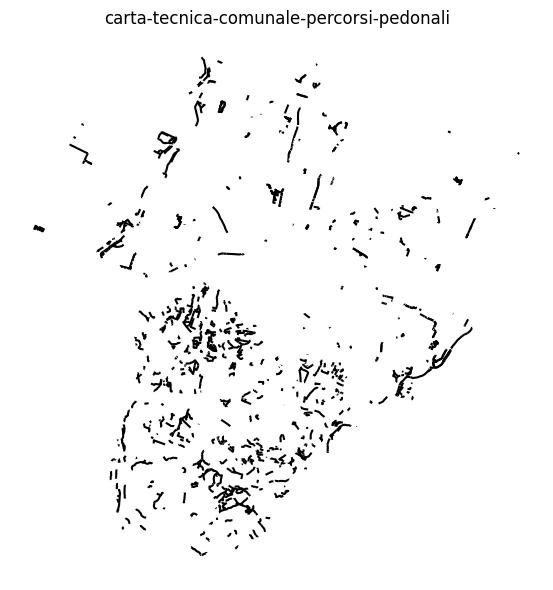



=== Layer: carta-tecnica-comunale-toponimi-parchi-e-giardini ===
Number of features: 252
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codvia', 'nomevia', 'tipo', 'geometry']
Missing values per column:
geo_point_2d    0
codvia          0
nomevia         0
tipo            0
geometry        0
dtype: int64


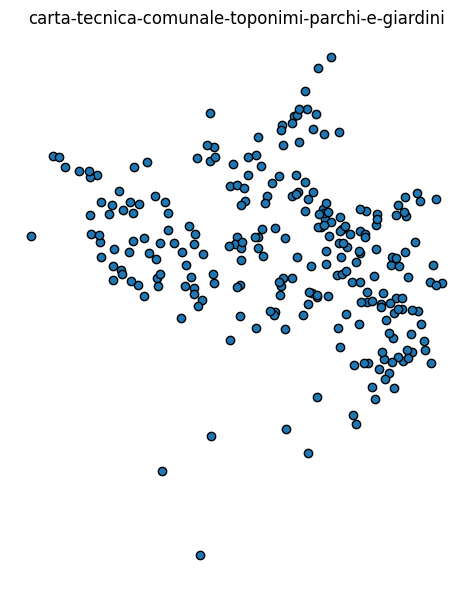



=== Layer: piste-ciclopedonali ===
Number of features: 1982
Geometry type: ['MultiLineString']
CRS: EPSG:4326
Columns: ['codice', 'anno', 'lunghezza', 'duso', 'dtipologia2', 'nomequart', 'geo_point_2d', 'zona_fiu', 'length', 'tipologia2', 'geometry']
Missing values per column:
codice           0
anno             0
lunghezza        0
duso             0
dtipologia2     22
nomequart        0
geo_point_2d     0
zona_fiu         0
length           0
tipologia2      22
geometry         0
dtype: int64


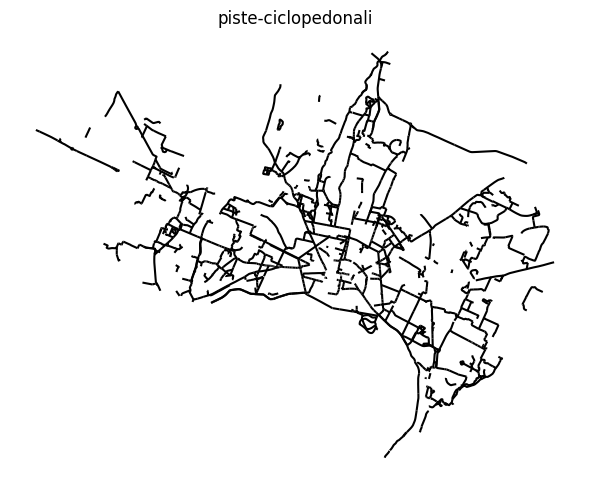



=== Layer: popolazione-arborea ===
Number of features: 9113
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'geo_shape', 'pop_area', 'classe_popolamento', 'classe_origine', 'classe_dimora', 'classe', 'data_agg', 'in_patrim', 'classe_struttura', 'classe_circonferenza_diametro', 'classe_altezza', 'geometry']
Missing values per column:
geo_point_2d                        0
geo_shape                        9113
pop_area                            0
classe_popolamento                  4
classe_origine                     15
classe_dimora                     242
classe                            109
data_agg                         1153
in_patrim                          25
classe_struttura                  101
classe_circonferenza_diametro     723
classe_altezza                     86
geometry                            0
dtype: int64


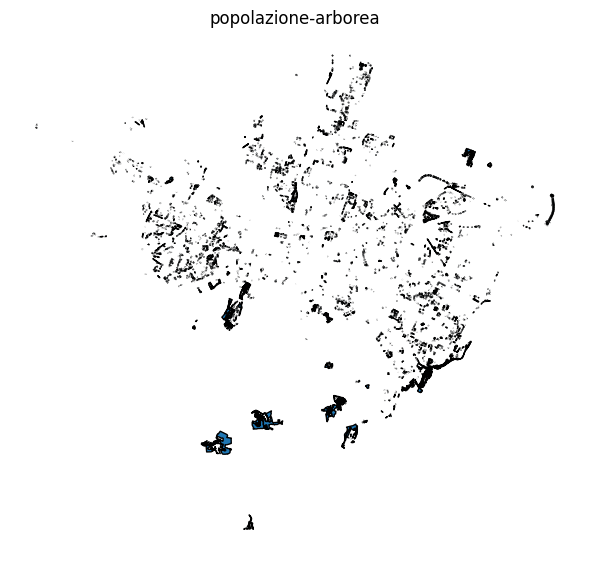



=== Layer: portici ===
Number of features: 12
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['id', 'titolo', 'testo', 'immagine_principale', 'videoguida_is', 'videoguida_lis', 'poi_id', 'url', 'coordinate', 'geometry']
Missing values per column:
id                      0
titolo                  0
testo                   0
immagine_principale     0
videoguida_is          12
videoguida_lis          0
poi_id                  0
url                     0
coordinate              0
geometry                0
dtype: int64


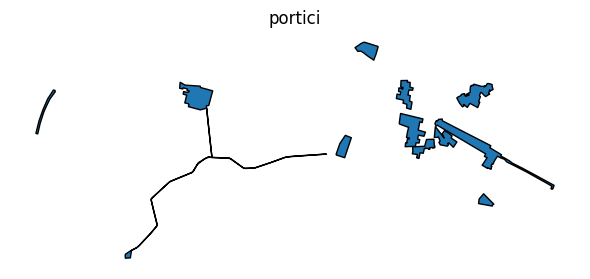



=== Layer: rastrelliere-per-biciclette ===
Number of features: 755
Geometry type: ['Point']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'id', 'nomevia', 'civico', 'numposti', 'geometry']
Missing values per column:
geo_point_2d      0
id                0
nomevia           0
civico          162
numposti          0
geometry          0
dtype: int64


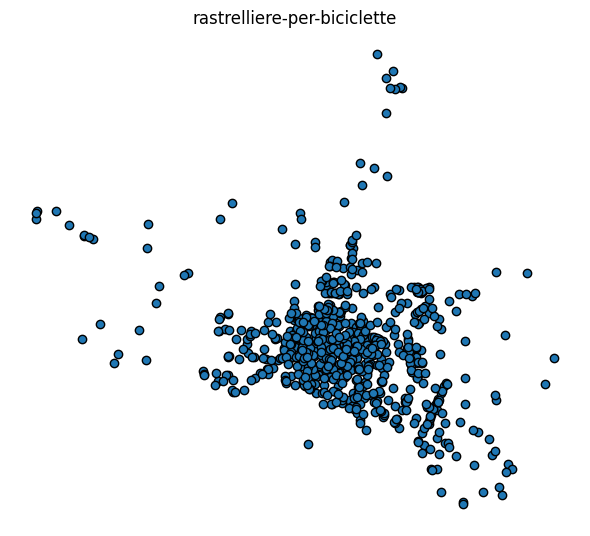



=== Layer: verde_privato_urbanizzato ===
Number of features: 25529
Geometry type: ['Polygon']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'codice_ogg', 'centro_sto', 'quartiere', 'patrimonio', 'note', 'area_ogg', 'geometry']
Missing values per column:
geo_point_2d        0
codice_ogg          0
centro_sto          0
quartiere           0
patrimonio          0
note            23521
area_ogg            0
geometry            0
dtype: int64


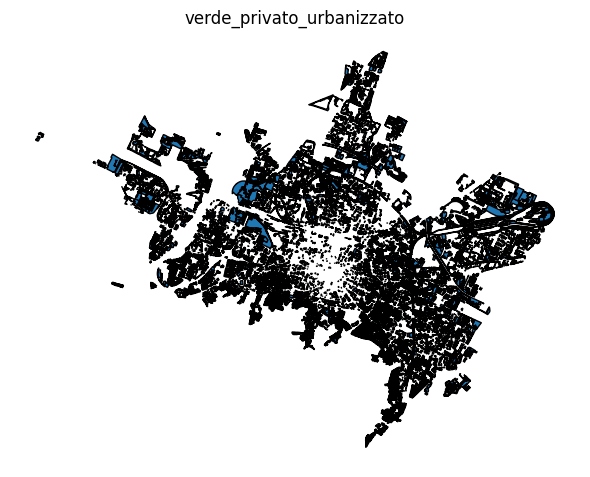



=== Layer: zona-pedonale-centro-storico ===
Number of features: 62
Geometry type: ['MultiPolygon']
CRS: EPSG:4326
Columns: ['geo_point_2d', 'ente', 'codice', 'ordinanza', 'stato', 'area', 'codarco1', 'nomevia1', 'codarco2', 'nomevia2', 'codarco3', 'nomevia3', 'codarco4', 'nomevia4', 'codarco5', 'nomevia5', 'codarco6', 'nomevia6', 'codarco7', 'nomevia7', 'iidd', 'tipoztl', 'geometry']
Missing values per column:
geo_point_2d     0
ente            62
codice          21
ordinanza        9
stato            8
area             8
codarco1        22
nomevia1        12
codarco2        37
nomevia2        36
codarco3        41
nomevia3        41
codarco4        49
nomevia4        49
codarco5        50
nomevia5        50
codarco6        55
nomevia6        55
codarco7        57
nomevia7        57
iidd            29
tipoztl          0
geometry         0
dtype: int64


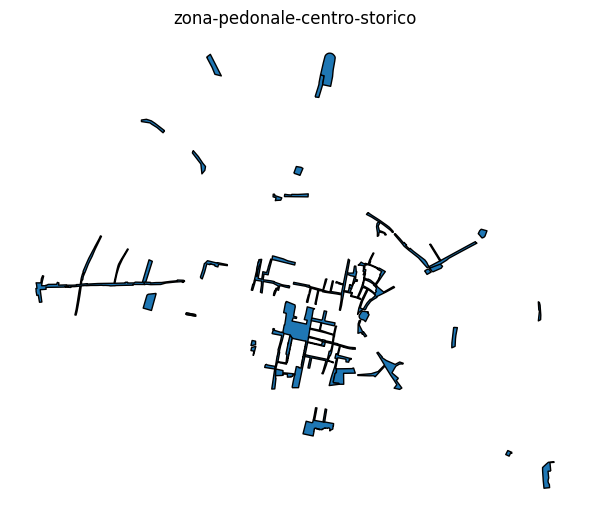



=== Layer: layer_styles ===
Non-spatial layer (no geometry). Skipping plot.




In [3]:
print(f"Found {len(layers)} layers.\n")

# Loop through each layer
for layer_name in layers:
    print(f"=== Layer: {layer_name} ===")
    
    try:
        gdf = gpd.read_file(gpkg_path, layer=layer_name)

        # Check if it's a GeoDataFrame with geometries
        if not gdf.empty and 'geometry' in gdf.columns:
            print(f"Number of features: {len(gdf)}")
            print(f"Geometry type: {gdf.geom_type.unique()}")
            print(f"CRS: {gdf.crs}")
            print("Columns:", list(gdf.columns))
            print("Missing values per column:")
            print(gdf.isnull().sum())

            gdf.plot(figsize=(6, 6), edgecolor='black')
            plt.title(f"{layer_name}")
            plt.axis('off')
            plt.tight_layout()
            plt.show()
            plt.close()
        else:
            print("Non-spatial layer. Skipping plot.")

        print("\n")

    except Exception as e:
        print(f"Failed to process {layer_name}: {e}")
        continue

In [7]:
summary_data = []

for layer_name in layers:
    try:
        gdf = gpd.read_file(gpkg_path, layer=layer_name)
        
        if 'geometry' not in gdf.columns:
            continue  # Skip non-spatial

        geom_types = gdf.geom_type.unique()
        num_features = len(gdf)
        crs = gdf.crs
        columns = list(gdf.columns)
        missing_data = gdf.isnull().mean() * 100 

        summary_data.append({
            "Layer": layer_name,
            "Geometry Types": ", ".join(geom_types),
            "Features": num_features,
            "CRS": crs.to_string() if crs else None,
            "Columns": columns,
            "Missing % (avg)": round(missing_data.mean(), 2)
        })

    except Exception as e:
        print(f"Error with layer {layer_name}: {e}")

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("Data/summary_layers.csv", index=False)
        

## Clustering

In [8]:
# Layer per cluster tematici
theme_layers = {
    "OSM base": [
        "037006_Bologna-2025-03-12T15Z — lines",
        "037006_Bologna-2025-03-12T15Z — multilinestrings",
        "037006_Bologna-2025-03-12T15Z — multipolygons",
        "037006_Bologna-2025-03-12T15Z — points",
        "037006_Bologna-2025-03-12T15Z — other_relations"
    ],
    "Mobilità": [
        "piste-ciclopedonali",
        "rastrelliere-per-biciclette",
        "cammini-e-percorsi",
        "zona-pedonale-centro-storico"
    ],
    "Aree verdi": [
        "aree-verdi_entrate_centroidi",
        "popolazione-arborea",
        "verde_privato_urbanizzato",
        "aree-ortive"
    ],
    "Servizi": [
        "bagni-pubblici",
        "attrezzature_ludiche_ginniche_sportive",
        "portici"
    ],
    "Tecnica/Toponomastica": [
        "aree-statistiche",
        "carta-tecnica-comunale-filari-siepi",
        "carta-tecnica-comunale-marciapiedi",
        "carta-tecnica-comunale-percorsi-pedonali",
        "carta-tecnica-comunale-toponimi-parchi-e-giardini"
    ]
}

all_summary = []

# Analisi per gruppo tematico
for group, layer_list in theme_layers.items():
    print(f"\nAnalisi gruppo: {group}")
    
    for layer_name in layer_list:
        try:
            gdf = gpd.read_file(gpkg_path, layer=layer_name)

            if 'geometry' not in gdf.columns:
                continue

            summary = {
                "Gruppo": group,
                "Layer": layer_name,
                "Geometria": ", ".join(gdf.geom_type.unique()),
                "CRS": gdf.crs.to_string() if gdf.crs else "None",
                "N° features": len(gdf),
                "Colonne": list(gdf.columns),
                "Missing % medio": round(gdf.isnull().mean().mean() * 100, 2)
            }
            all_summary.append(summary)

            print(f"{layer_name}: {summary['N° features']} feature, geom: {summary['Geometria']}")

        except Exception as e:
            print(f"Errore su {layer_name}: {e}")

summary_df = pd.DataFrame(all_summary)
summary_df.to_csv("Data/summary_groups.csv", index=False)



Analisi gruppo: OSM base
037006_Bologna-2025-03-12T15Z — lines: 36734 feature, geom: LineString
037006_Bologna-2025-03-12T15Z — multilinestrings: 509 feature, geom: MultiLineString
037006_Bologna-2025-03-12T15Z — multipolygons: 62007 feature, geom: MultiPolygon
037006_Bologna-2025-03-12T15Z — points: 171737 feature, geom: Point
037006_Bologna-2025-03-12T15Z — other_relations: 1504 feature, geom: GeometryCollection

Analisi gruppo: Mobilità
piste-ciclopedonali: 1982 feature, geom: MultiLineString
rastrelliere-per-biciclette: 755 feature, geom: Point
cammini-e-percorsi: 2096 feature, geom: MultiLineString
zona-pedonale-centro-storico: 62 feature, geom: MultiPolygon

Analisi gruppo: Aree verdi
aree-verdi_entrate_centroidi: 1200 feature, geom: Point
popolazione-arborea: 9113 feature, geom: MultiPolygon
verde_privato_urbanizzato: 25529 feature, geom: Polygon
aree-ortive: 21 feature, geom: Point

Analisi gruppo: Servizi
bagni-pubblici: 30 feature, geom: Point
attrezzature_ludiche_ginniche_s

## Create interactive map

In [9]:
m = folium.Map(location=[44.4949, 11.3426], zoom_start=13, tiles=None)

layers_OSM = [
    "037006_Bologna-2025-03-12T15Z — lines",
    "037006_Bologna-2025-03-12T15Z — multilinestrings",
    "037006_Bologna-2025-03-12T15Z — multipolygons",
    "037006_Bologna-2025-03-12T15Z — points",
    "037006_Bologna-2025-03-12T15Z — other_relations"
]

layers_map = set(layers) - set(layers_OSM)

for layer_name in layers:
    try:
        gdf = gpd.read_file(gpkg_path, layer=layer_name)

        if gdf.empty or 'geometry' not in gdf.columns:
            continue

        if layer_name in layers_OSM:
            folium.TileLayer('OpenStreetMap').add_to(m)
            continue

        fg = folium.FeatureGroup(name=layer_name, show=False)

        # Select fields for popup and tooltip (exclude geometry and columns ending with 'id')
        popup_fields = [col for col in gdf.columns if col != 'geometry' and not col.lower().endswith('id')]

        folium.GeoJson(
            gdf,
            name=layer_name,
            popup=folium.GeoJsonPopup(fields=popup_fields),
            tooltip=folium.GeoJsonTooltip(
                fields=popup_fields,
                aliases=[f"{f}: " for f in popup_fields],
                localize=True,
                sticky=True,
                labels=True,
                style="background-color: white; border: 1px solid black; padding: 5px;"
            )
        ).add_to(fg)

        fg.add_to(m)

    except Exception as e:
        print(f"Error with layer {layer_name}: {e}")

folium.LayerControl(collapsed=False).add_to(m)
m.save("mappa_bologna_interattiva.html")

Error with layer carta-tecnica-comunale-filari-siepi: Object of type Timestamp is not JSON serializable
Error with layer carta-tecnica-comunale-marciapiedi: Object of type Timestamp is not JSON serializable
Error with layer carta-tecnica-comunale-percorsi-pedonali: Object of type Timestamp is not JSON serializable
Error with layer popolazione-arborea: Object of type Timestamp is not JSON serializable


## Restricting the working area

In [29]:
# Restricting the working area to the center of Bologna - mura
aree_statistiche = gpd.read_file(gpkg_path, layer="aree-statistiche")

working_area = aree_statistiche[
    aree_statistiche["area_statistica"].isin(["MALPIGHI-1", "IRNERIO-1", "GALVANI-1", "MARCONI-1", "MALPIGHI-2", "IRNERIO-2", "GALVANI-2", "MARCONI-2"])
].copy()

working_geom = unary_union(working_area.geometry)

working_layers = [layer for layer in fiona.listlayers(gpkg_path) 
          if layer not in ["layer_styles", "aree-statistiche", "other_relations"]]

# Clip ciascun layer alla geometria di interesse
clipped_layers = {}
output_gpkg = "Data/city_center.gpkg"


for layer in working_layers:
    gdf = gpd.read_file(gpkg_path, layer=layer)

    if gdf.crs is None:
        print(f"⚠️ Layer '{layer}' non ha CRS. Salto o imposto uno a mano.")
        continue  

    gdf = gdf.to_crs(working_area.crs)
    gdf = gdf[gdf.is_valid]

    try:
        gdf_clipped = gpd.clip(gdf, working_geom)
    except Exception as e:
        print(f"Errore nel clipping di {layer}: {e}")
        continue

    clipped_layers[layer] = gdf_clipped

    if not gdf_clipped.empty:
        gdf_clipped.to_file(output_gpkg, layer=layer, driver="GPKG")
    else:
        print(f"Layer '{layer}' è vuoto dopo il clip e non è stato salvato.")



⚠️ Layer '037006_Bologna-2025-03-12T15Z — other_relations' non ha CRS. Salto o imposto uno a mano.
Layer 'aree-ortive' è vuoto dopo il clip e non è stato salvato.


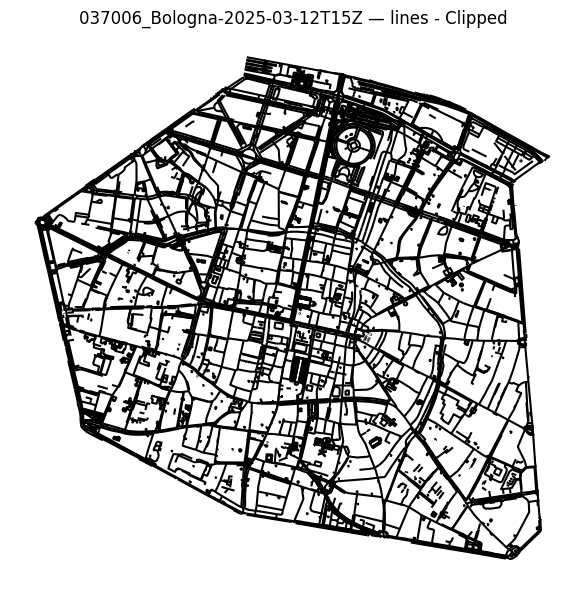

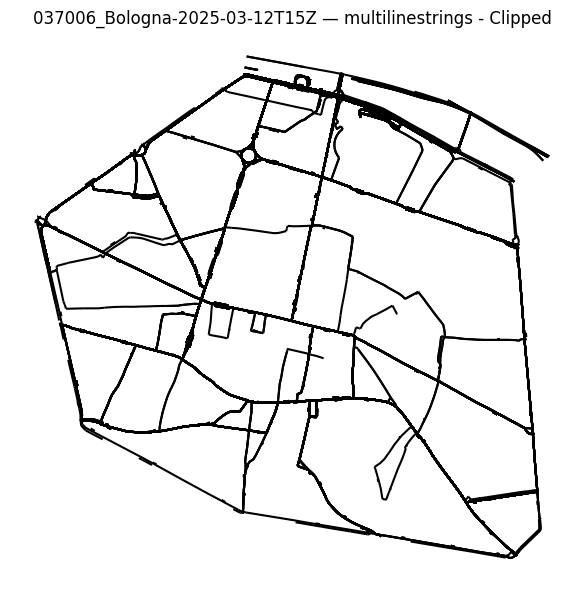

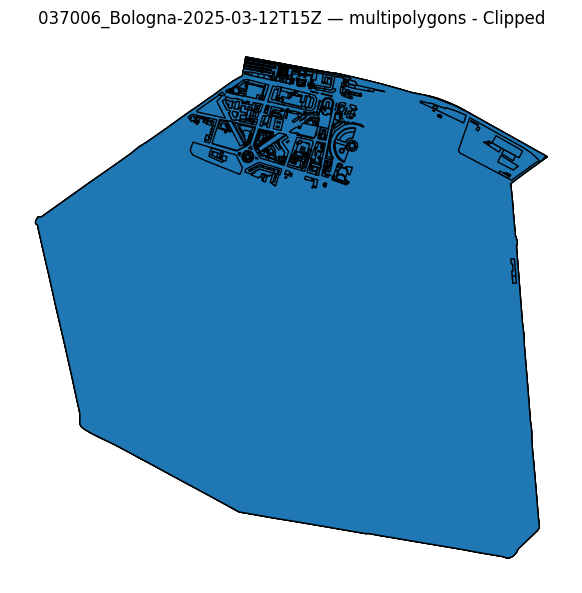

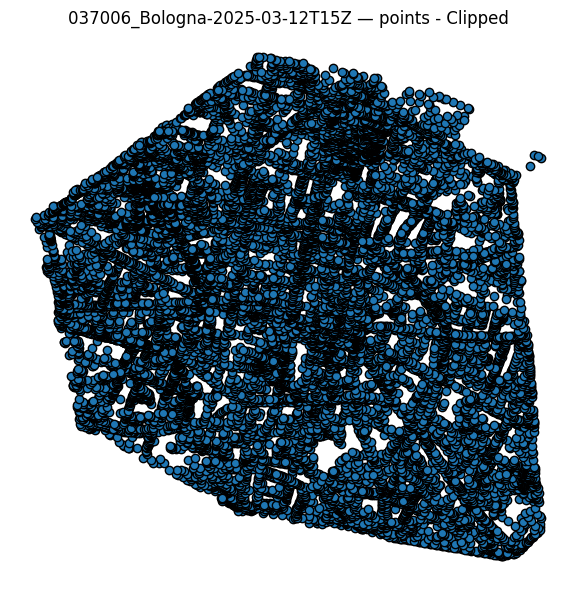

Layer 'aree-ortive' è vuoto o privo di geometrie.


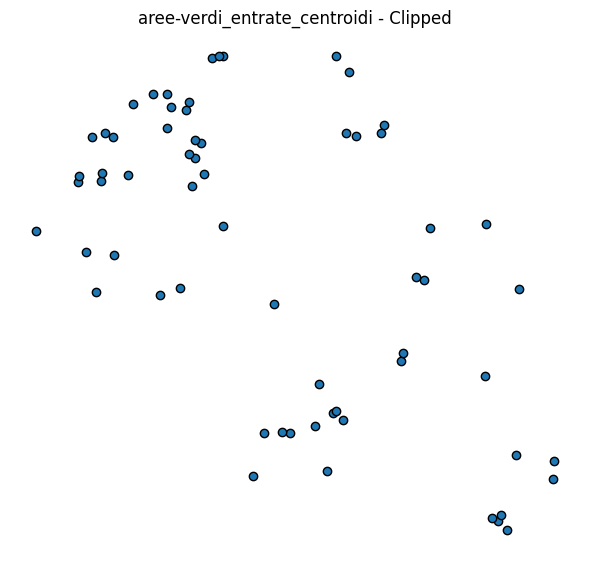

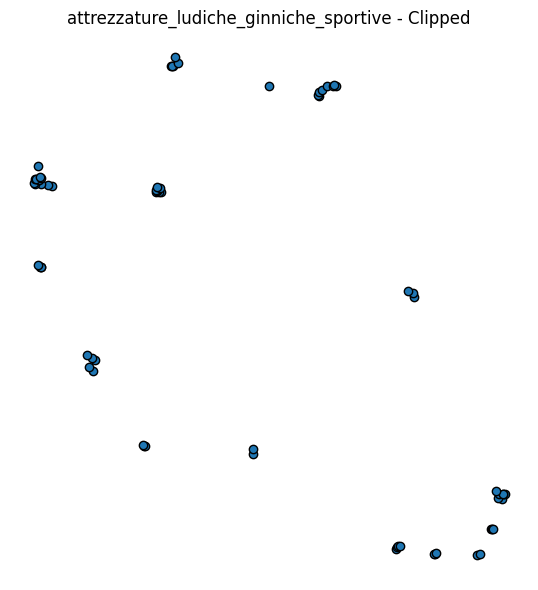

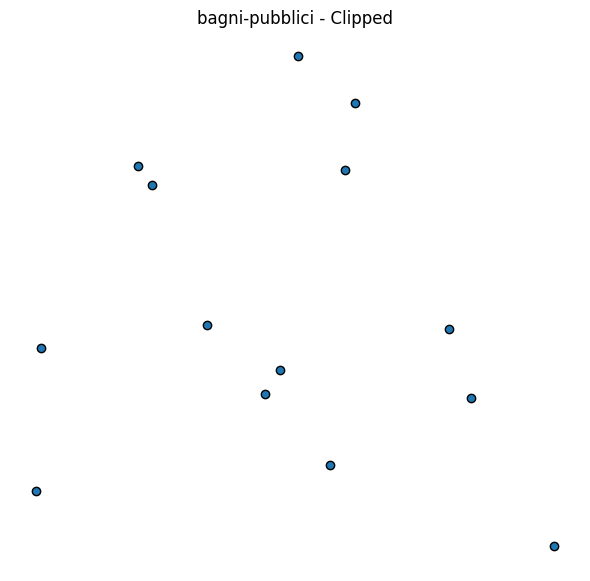

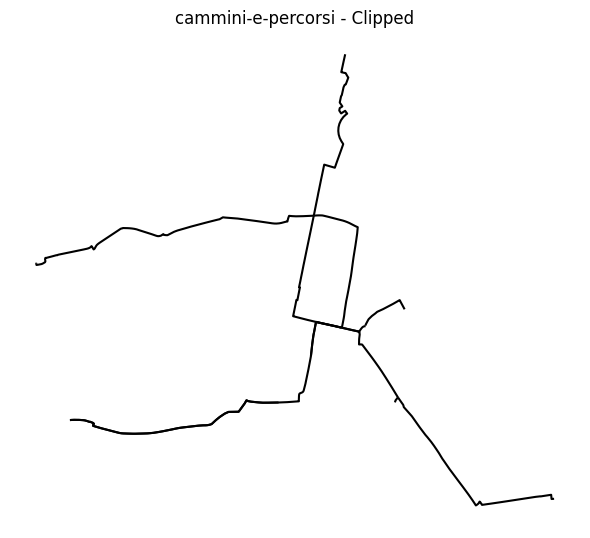

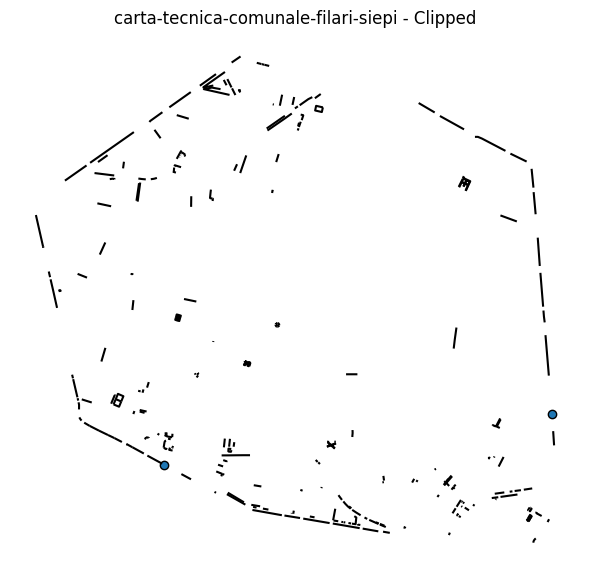

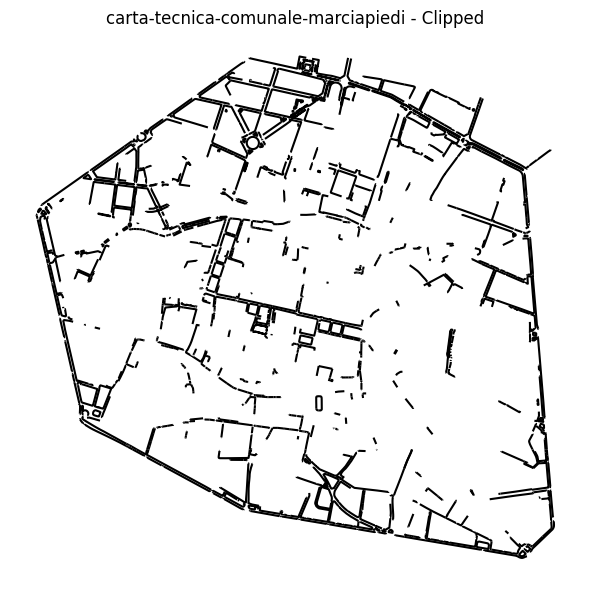

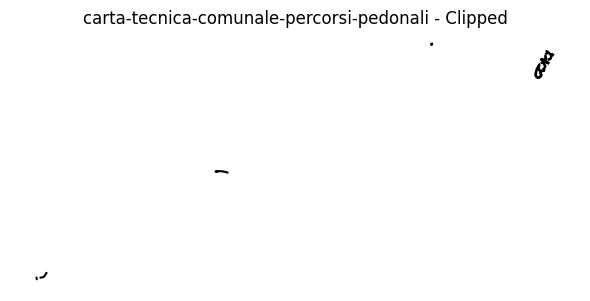

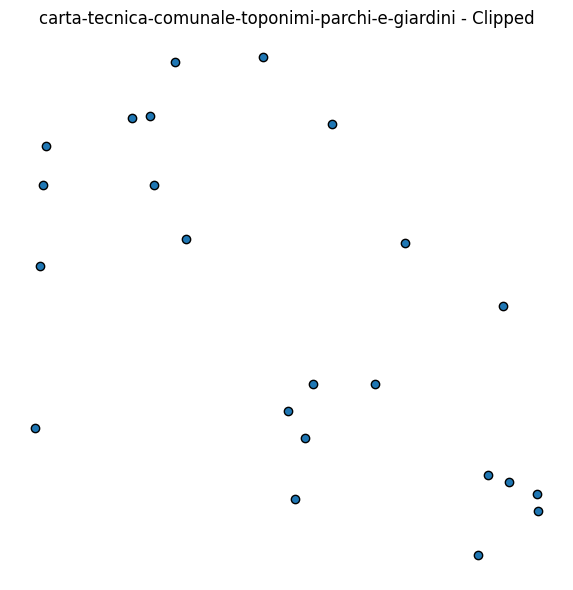

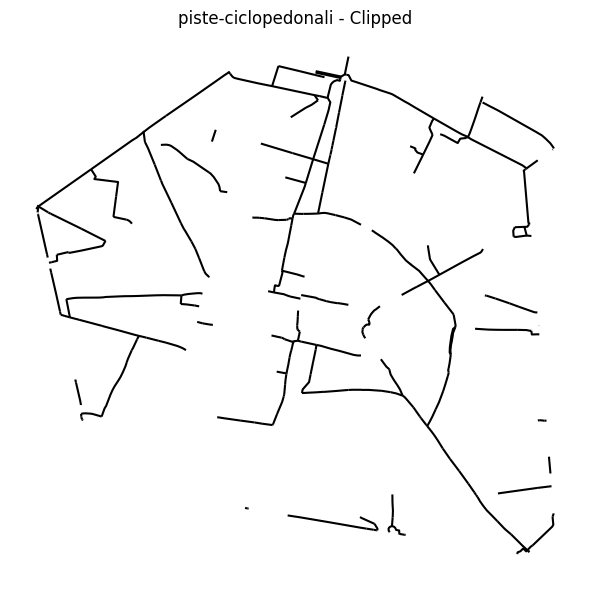

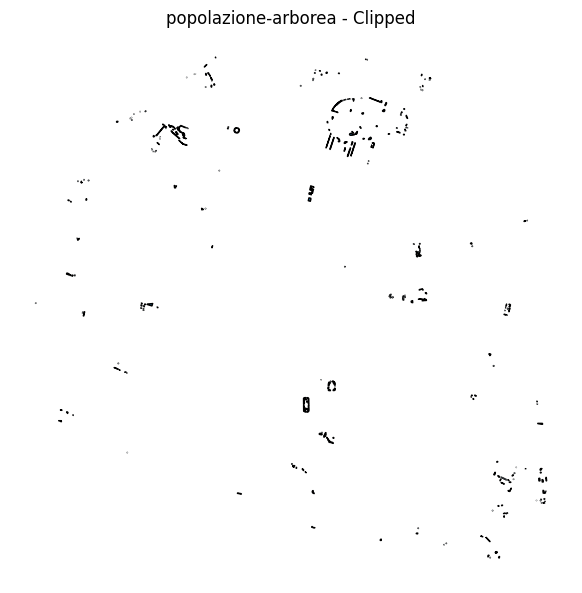

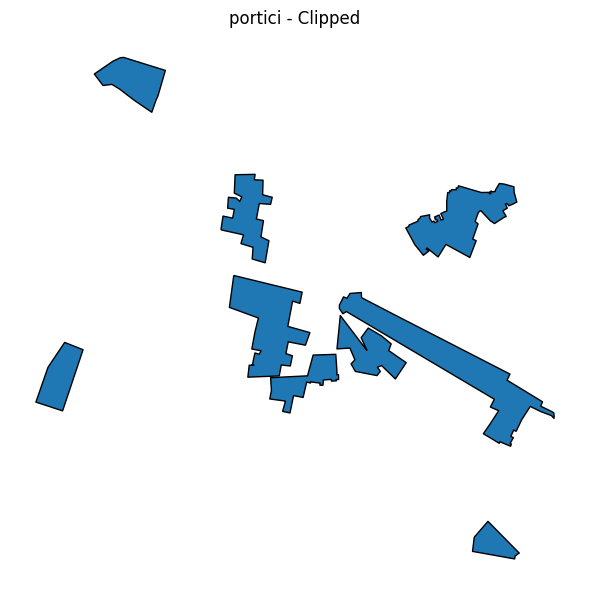

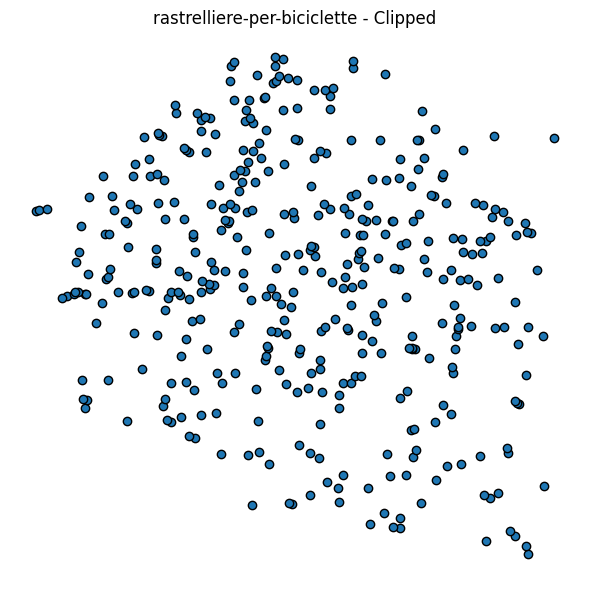

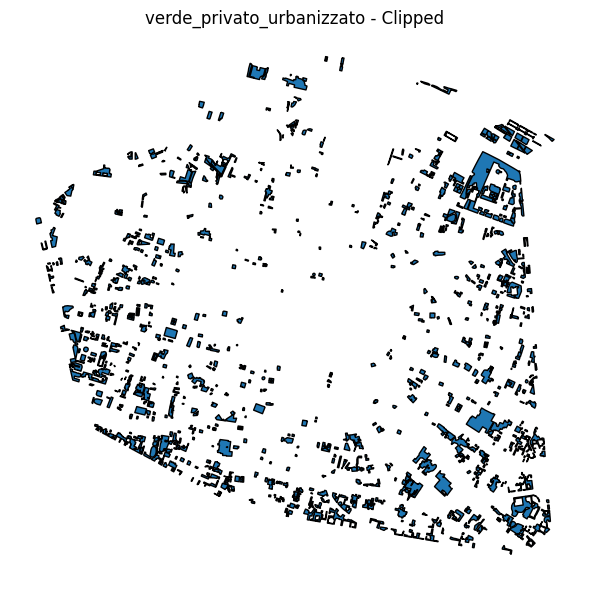

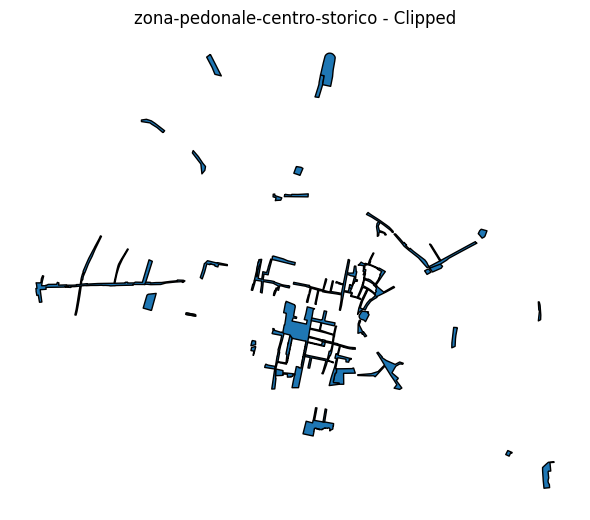

In [30]:
# Visualizza i layer clipati
for layer_name, gdf in clipped_layers.items():
    if not gdf.empty and 'geometry' in gdf.columns:
        gdf.plot(figsize=(6, 6), edgecolor='black')
        plt.title(f"{layer_name} - Clipped")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        plt.close()
    else:
        print(f"Layer '{layer_name}' è vuoto o privo di geometrie.")